# Regresia liniara

**Termen de predare: 4 noiembrie 2022, ora 20:00**

Se vor folosi type annotations pentru variabile, parametrii tuturor funcțiilor, tipuri de retur. Se vor folosi docstrings pentru toate funcțiile. Neîndeplinirea acestei cerințe duce la înjumătățirea punctajului pentru exercițiul în cauză.

Se acordă doua puncte din oficiu. Fișierul va fi denumit tema4_ia_nume_prenume.ipynb. Verificați înainte de trimitere faptul ca execuția celulelor de sus în jos funcționează corespunzător. Aserțiunile sunt obligatoriu a fi indeplinite. Suplimentar, puteti face verificari si pentru alte valori.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from typing import Tuple, List

## Citirea datelor

In [2]:
# data source: https://www.kaggle.com/datasets/quantbruce/real-estate-price-prediction

path = './data/Real estate.csv'
full_data = pd.read_csv(path, index_col='No')

# Primele 5 linii
full_data.head(5)
# full_data.describe() #show the description of the dataset
# full_data.info() #show the info of the dataset

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
No,,,,,,,
1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [3]:
full_data.info() #show the info of the dataset

<class 'pandas.core.frame.DataFrame'>
Int64Index: 414 entries, 1 to 414
Data columns (total 7 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   X1 transaction date                     414 non-null    float64
 1   X2 house age                            414 non-null    float64
 2   X3 distance to the nearest MRT station  414 non-null    float64
 3   X4 number of convenience stores         414 non-null    int64  
 4   X5 latitude                             414 non-null    float64
 5   X6 longitude                            414 non-null    float64
 6   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 25.9 KB


In [4]:
full_data.describe() #show the description of the dataset

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


In [5]:
# stergem coloana 'X1 transaction date'
full_data.drop(labels='X1 transaction date', axis=1, inplace=True)
full_data.head(5)
# full_data.drop(labels='X3 distance to the nearest MRT station', axis=1, inplace=True)
# full_data.head(10)



,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
No,,,,,,
1,32.0,84.87882,10,24.98298,121.54024,37.9
2,19.5,306.59470,9,24.98034,121.53951,42.2
3,13.3,561.98450,5,24.98746,121.54391,47.3
4,13.3,561.98450,5,24.98746,121.54391,54.8
5,5.0,390.56840,5,24.97937,121.54245,43.1


<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

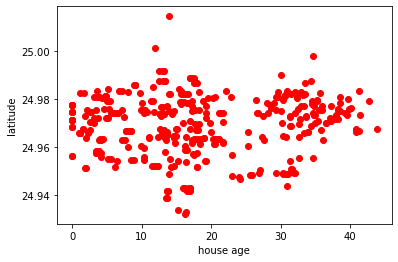

In [6]:
x = full_data['X2 house age'].values
y = full_data['X5 latitude'].values
plt.scatter(x,y,color='red')
plt.xlabel('house age')
plt.ylabel('latitude')
plt.plot#linear 

## Selectare subseturi de antrenare si de testare

Setul de date initial se imparte in doua: pe 70% din date se face antrenarea modelului - determinarea ponderilor $\theta$, iar pe restul se face testare, pentru a vedea cat de bine generalizeaza modelul. 

Intrucat ordinea initiala a datelor ar putea defavoriza modelul (in datele de mai sus, primele inregistrari sunt cele mai vechi vanzari; cele mai recente sunt ultimele din fisier), decidem sa amestecam in prealabil datele si apoi sa facem impartirea lor. 

In [7]:
from tabulate import tabulate
# amestec aleator al inregistrarilor
full_data = full_data.sample(frac=1)

# split de date
percent_train = 0.7  # 70% din intregul set este folosit pentru antrenare
# restul pentru testare


len_train = int(len(full_data) * percent_train)

# in train vom selecta primele 70% din date si transformam in numpy array
train = np.array(full_data[:len_train])
test = np.array(full_data[len_train:])

assert isinstance(train, np.ndarray), 'Train set should be an array'
assert isinstance(test, np.ndarray), 'Test set should be an array'

assert len(train) + len(test) == len(full_data)
assert train.shape[1] == test.shape[1] == len(full_data.columns), 'The number of columns should be the same'

print(len(full_data), "=", len(train), "+", len(test), "(Lungime full_data = Lungime train + Lungime test)\n")

print("    full_data[3]:\n", tabulate([full_data.iloc[3]], headers='keys', tablefmt='plain-text', showindex=False))
print("    train[3]:\n", train[3], '\n\n')

print("    full_data[{}]=".format(len_train+3))
print(tabulate([full_data.iloc[len_train+3]], headers='keys', tablefmt='plain-text', showindex=False))
print("    test[3]:\n", test[3])

414 = 289 + 125 (Lungime full_data = Lungime train + Lungime test)

    full_data[3]:
   X2 house age    X3 distance to the nearest MRT station    X4 number of convenience stores    X5 latitude    X6 longitude    Y house price of unit area
--------------  ----------------------------------------  ---------------------------------  -------------  --------------  ----------------------------
          15.9                                   289.325                                  5         24.982         121.543                            53
    train[3]:
 [ 15.9     289.3248    5.       24.98203 121.54348  53.     ] 


    full_data[292]=
  X2 house age    X3 distance to the nearest MRT station    X4 number of convenience stores    X5 latitude    X6 longitude    Y house price of unit area
--------------  ----------------------------------------  ---------------------------------  -------------  --------------  ----------------------------
           2.3                                  

In [8]:
# ultima coloana din x_train, x_test sunt valoarile ce se prezic, restul sunt atributele de intrare
#x_train primeste de la prima la ultima linie si de la prima la penultima coloana
#Y_train primeste de la prima la ultima linie doar ultima coloana
x_train, y_train = train[:, :-1], train[:, -1]
x_test, y_test = test[:, :-1], test[:, -1]

#intoarce matricea y 
y_train=np.transpose([y_train])
y_test = np.transpose([y_test])

assert x_train.shape[0] == train.shape[0]
assert x_test.shape[0] == test.shape[0]

assert y_train.shape == (x_train.shape[0], 1), f'Vectorul y_train este vector coloana'
assert y_test.shape == (x_test.shape[0], 1), f'Vectorul y_test este vector coloana'

Functiile de mai jos sunt utilizate pentru transformarea convenabila a datelor:

Pentru scalarea valorilor din setul de instruire intre 0 si 1 e nevoie sa stim minimul si maximul pentru fiecare atribut. Pentru o matrice de valori de forma
$$
\mathbf{X} = 
\begin{pmatrix}
x_0^{(1)} & x_1^{(1)} & x_2^{(1)} & \dots & x_n^{(1)}
\\
x_0^{(2)} & x_1^{(2)} & x_2^{(2)} & \dots & x_n^{(2)}
\\
\vdots & \vdots & \vdots	& \vdots & \vdots
\\
x_0^{(1)} & x_1^{(m)} & x_2^{(m)} & \dots & x_n^{(m)}
\end{pmatrix}
$$
se obtin: minimele si maximele pentru fiecare coloana $min_i$, $max_i$, se scade din fiecare valoare minimul de pe coloana sa si se imparte la diferenta intre maximul si minimul pe acea coloana. Trebuie avuta in vedere situatia in care o coloana e constanta - de exemplu prima coloana 1, in matricea de design.

## Functii de preprocesare

In [9]:
def get_min_max_cols(mat: np.ndarray) -> Tuple[np.ndarray, np.ndarray]:
    """
    Pentru o matrice data, calculeaza si returneaza maximele si minimele pe fiecare coloana.
    
    :param mat: matrice cu cel putin doua linii
    :return: minimele si de maximele pe coloane. 
    """
    mins, maxes = mat.min(axis=0, keepdims=True), mat.max(axis=0, keepdims=True)
    # se recomanda ca sa se returneze minimele si maximele ca matrice cu cate o linie. 
    # Indicatie: folositi parametrul keepdims
    assert mins.shape == maxes.shape == (1, mat.shape[1])
    return mins, maxes

Matricea de design are pe prima coloana valoarea 1, pentru a permite termen liber. Restul coloanelor sunt din datele citite

In [10]:
def get_design_matrix(mat: np.ndarray) -> np.ndarray:
    """
    Functia adauga o coloana de 1 la matricea :param mat:, pentru a permite un 
    termen liber in modelul liniar. Matricea data ca parametru nu se modifica.
    
    :param mat: matricea de la care se pleaca. contine doar valori de atribute
    :return: matrice de design, provenind din coloana plina cu 1 adaugata 
    inaintea matricei mat
    """
    result = np.insert(mat, 0, 1, axis=1)
    assert result.shape == (mat.shape[0], mat.shape[1]+1)
    assert np.all(result[:, 0] == 1)
    return result

Implementam scalarea datelor la intervalul $[0, 1]$:

In [11]:
def scale_values(mat: np.ndarray, min_cols: np.ndarray, max_cols: np.ndarray) -> np.ndarray:
    """
    Primind minimele si maximele pentru :param mat:, obtine matricea scalata: 
    din valorile de pe coloana i se scade minimul de indice i, adica min_cols[i] 
    si se imparte la (max_cols[i] - min_cols[i])
    
    :param mat: matricea pentru care se doreste obtinerea unei matrice scalate
    :param min_cols: minimele pe fiecare coloana
    :param max_cols: maximele pe fiecare coloana
    :return: o matrice de aceeasi forma ca si :param mat:, cu valorile scalate in intervalul [0, 1]
    """
    
    assert isinstance(mat, np.ndarray) and mat.ndim == 2, 'mat trebuie sa fie o matrice'
    assert mat.shape[0] > 1, 'cel putin doua coloane'
    assert mat.shape[1] == min_cols.shape[-1] == max_cols.shape[-1]
    
    # se trateaza cazul in care o coloana este constanta, i.e. minimul si maximul pe ea coincid. 
    # aceste coloane nu vor face impartirea, pentru ca ar rezulta o impartire la 0
    
    result=mat;
    for i_column in range(result.shape[1]):
        if result[:, i_column].min() == result[:, i_column].max():
            continue
        result[:, i_column]=(result[:, i_column]-min_cols[0, i_column])/(max_cols[0, i_column]-min_cols[0, i_column])
    
    assert result.shape == mat.shape, 'Forma matricei se pastreaza'
    
    return result

In [12]:
# testare cod

_mat = np.random.randn(1000, 1000) * 50
min_mat, max_mat = get_min_max_cols(_mat)
_mat_scaled = scale_values(_mat, min_mat, max_mat)

epsilon = 1e-5  # valoare pozitiva foarte mica; calculele in floating point pot duce la valori "aproximativ 0" sau 
# "aproximativ 1" 

assert np.min(_mat_scaled) >= -epsilon, f'Matricea nu e scalata in [0, 1]: minimul ei este {np.min(_mat_scaled)}'
assert np.max(_mat_scaled) <= 1 + epsilon, f'Matricea nu e scalata: maximul ei este {np.max(_mat_scaled)}'

_mat = get_design_matrix(_mat)  # adauga o coloana de 1
min_mat, max_mat = get_min_max_cols(_mat)
_mat_scaled = scale_values(_mat, min_mat, max_mat)
print("Minimiul si maximul din matrice: ", np.min(_mat_scaled), np.max(_mat_scaled))
assert np.min(_mat_scaled) >= -epsilon, f'Matricea nu e scalata in [0, 1]: minimul ei este {np.min(_mat_scaled)}'
assert np.max(_mat_scaled) <= 1 + epsilon, f'Matricea nu e scalata: maximul ei este {np.max(_mat_scaled)}'


Minimiul si maximul din matrice:  0.0 1.0


Se preproceseaza setul de antrenare: matrice de design -> scalare:

In [13]:
# obtinem matricea de design
x_train = get_design_matrix(x_train)

# calculam minime si maxime pe coloane, din setul de antrenare
# acestea vor fi folosite si pentru transformarea datelor din setul de testare
x_train_min, x_train_max = get_min_max_cols(x_train)

# scalam datele la intervalul [0, 1], folosim scale_values
x_train_scaled = scale_values(x_train, x_train_min, x_train_max)

epsilon = 1e-5  # valoare pozitiva foarte mica

assert np.min(x_train_scaled) >= -epsilon, f'Matricea nu e scalata in [0, 1]: minimul ei este {np.min(_mat_scaled)}'
assert np.max(x_train_scaled) <= 1 + epsilon, f'Matricea nu e scalata: maximul ei este {np.max(_mat_scaled)}'

Pentru setul de testare se face acelasi tip de preprocesare, cu observatia ca pentru scalare se vor folosi valorile din `x_train_min` si `x_train_max`:

In [14]:
x_test = get_design_matrix(x_test)

x_test_scaled = scale_values(x_test, x_train_min, x_train_max)

print(f'Ar trebui ca valorile minime din setul de testare pe fiecare coloana sa nu fie mult diferite fata de 0, exceptand prima coloana')
print(f'minim pe coloane pentru setul de testare: {np.min(x_test_scaled)}')

print(f'Ar trebui ca valorile maxime din setul de testare pe fiecare coloana sa nu fie mult diferite fata de 1. Pentru prima coloana trebuie sa fie chiar 1')
print(f'minim pe coloane pentru setul de testare: {np.max(x_test_scaled)}')

Ar trebui ca valorile minime din setul de testare pe fiecare coloana sa nu fie mult diferite fata de 0, exceptand prima coloana
minim pe coloane pentru setul de testare: -0.017890462078869334
Ar trebui ca valorile maxime din setul de testare pe fiecare coloana sa nu fie mult diferite fata de 1. Pentru prima coloana trebuie sa fie chiar 1
minim pe coloane pentru setul de testare: 1.1945570353213566


## Model de regresie liniara

Modelul de predictie este:
$$
h_\theta(X) = X \cdot \theta
$$
unde $X$ este matrice de design iar $\theta$ vector de ponderi. 

In [15]:
def model_predict(theta: np.ndarray, x: np.ndarray) -> np.ndarray:
    """
    Efectueaza predictii pentru valorile din matricea :param x:, folosind
    parametrii din :param theta:.
    
    :param theta: matrice coloana de ponderi
    :param x: matrice de design. Fiecare linie contine valorile atributelor 
    pentru o inregistrare.
    
    
    :return: matrice coloana de predictii, cu acelasi numar de linii ca si 
    :param x:.
    """
    # numarul de trasaturi din x este egal cu numarul de coeficienti din theta
    assert x.shape[1] == theta.shape[0]
    # vectorul theta e vector coloana
    assert theta.shape[1] == 1
    result = np.dot(x, theta) #inmultire matrici linie cu col...
    assert result.shape == (x.shape[0], 1)
    return result

In [16]:
# verificari

np.random.seed(100)

_x = np.random.rand(3, 2)
_y = np.random.rand(3, 1)
_theta = np.ones((2, 1))

assert np.allclose(model_predict(_theta, _x), np.array([[0.82177433],
       [1.26929372],
       [0.12628798]]))

## Functia de eroare (de cost, loss function)

Functia de eroare masoara cat de diferite sunt predictiile fata de valorile cunoscute (ground truth). Aici folosim ca functie de eroare jumatate din [eroarea patratica medie](https://en.wikipedia.org/wiki/Mean_squared_error):

In [17]:
def loss(theta: np.ndarray, x: np.ndarray, y: np.ndarray) -> float:
    """
    Functie de eroare folosita pentru calcul de gradienti. 
    
    :param theta: matrice coloana de ponderi
    :param x: matrice de design. Fiecare linie contine valorile atributelor 
    pentru o inregistrare.
    :param y: valorile de iesire asociate fiecarei inregistrari.
    
    :return: valoare scalara, reprezentand eroarea.
    """
    m = x.shape[0]
    y_hat = model_predict(theta, x)
    result = 1/(2*m) * np.sum((y_hat - y)**2)
    return result

In [18]:
np.random.seed(100)

_x = np.random.rand(3, 2)
_y = np.random.rand(3, 1)
_theta = np.ones((2, 1))

assert np.allclose(loss(_theta, _x, _y), 0.03659284388808936)

## Calcul de gradienti si antrenare

In [19]:
def gradient(theta: np.ndarray, x: np.ndarray, y: np.ndarray) -> np.ndarray:
    """
    Calculeaza gradientul pentru un model liniar cu parametrii :param theta:,
    pentru intrarea :param x: si iesirea :param y:
    
    :param theta: matrice coloana de parametri
    :param x: matricea de design cu valorile de intrare
    :param y: valorile de iesire
    :return: vectorul de valori de iesire 
    """
    
    assert theta.shape[0] == x.shape[1]
    m = x.shape[0]
    y_hat = model_predict(theta, x)
    assert y_hat.shape == (m, 1)
    grad = 1/m * np.dot(x.T, (y_hat - y))
    assert grad.shape == theta.shape
    return grad

In [20]:
def train(x: np.ndarray, y: np.ndarray, alpha:float=0.1, max_iters = 10000, verbose=True) -> Tuple[np.ndarray, List[float]]:
    """
    Antreneaza modelul liniar pe setul de antrenare :param x:, :param y:. 
    Returneaza lista de valori de eroare si vectorul de ponderi la care s-a ajuns
    
    :param x: matricea de design cu valorile de intrare
    :param y: valorile de iesire
    :param alpha: rata de invatare, valoare implicita 0.1
    :param max_iters: numarul maxim de iteratii permise. Daca se ajunge la acest prag se opreste antrenarea. 
    :param verbose: daca e True, atunci se va afisa la fiecare 1000 de iteratii: numarul iteratiei si loss-ul curent
    :return: un tuplu cu ponderile rezultate si lista de valori ale functiei de eroare
    """
    eps = 1e-6
    assert x.shape[0] == y.shape[0]
    assert np.all(x[:, 0] == 1), 'Prima coloana trebuie sa fie 1'
    m, n = x.shape
    theta = np.zeros((n, 1)) # matrice coloana cu valori de 0
    assert theta.shape == (n, 1)
    assert np.all(theta==0)
    
    losses = []
    losses.append(loss(theta, x, y))
    iters = 0
    while True:
        iters += 1
        theta = theta - alpha * gradient(theta, x, y)
        current_loss = loss(theta, x, y)
        losses.append(current_loss)
        if (np.abs(losses[-1] - losses[-2]) < eps) or (iters > max_iters):
            break
        if np.isnan(current_loss) or np.isinf(current_loss):
            break
        if verbose and iters % 1000 == 0:
            print(f'Iteratia {iters}; loss = {current_loss}')
    return theta, losses

In [21]:
theta, losses = train(x_train_scaled, y_train, alpha=0.5)

Iteratia 1000; loss = 25.788405576572302
Iteratia 2000; loss = 25.766512733795


In [22]:
print(f'losses={losses}')

losses=[762.2170242214532, 55.55139717393169, 51.86474668014775, 49.57726923325023, 47.513563773725025, 45.64940821315371, 43.964757857451424, 42.44162638433491, 41.063869293461984, 39.81699278286385, 38.68798262663126, 37.66515094582997, 36.737998991536195, 35.897094257315906, 35.13396041592216, 34.44097873368145, 33.81129975796611, 33.238764200081754, 32.71783204942189, 32.24351905627535, 31.811339811483776, 31.41725673237144, 31.057634337020367, 30.729198253948166, 30.428998472374, 30.154376390254807, 29.902935263787377, 29.67251370368149, 29.461161900733266, 29.267120296530035, 29.088800444911413, 28.924767836468188, 28.77372648221049, 28.63450507387744, 28.506044557455503, 28.387386973560314, 28.27766543362772, 28.176095114544182, 28.081965166593466, 27.994631440557967, 27.91350994962382, 27.838070990520674, 27.767833856188357, 27.70236207929984, 27.641259152270415, 27.584164675023896, 27.530750886837428, 27.48071954310922, 27.433799101944036, 27.38974218907806, 27.348323312914424

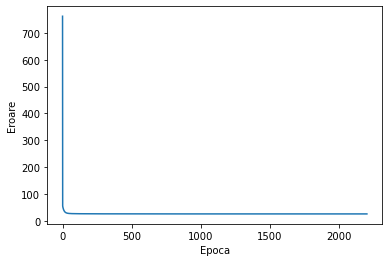

In [23]:
plt.plot(losses)
plt.xlabel('Epoca')
plt.ylabel('Eroare')
plt.show()

## Testarea modelului 

In [24]:
# functie mean squared error

def mse(y_true: np.ndarray, y_hat: np.ndarray) -> float:
    """
    Calculeaza mean squared error pentru vectorii :param y_true: si :param y_hat:.
    
    :param y_true: vector de valori ground truth
    :param y_test: vector de valori prezisi de un model.
    
    :param return: mean squared error
    """
    
    return 1/y_true.shape[0] * np.sum((y_true - y_hat)**2)

### Testarea pe setul de antrenare

In [25]:
y_hat_train = model_predict(theta, x_train_scaled)
    
print(f'Mean squared error pentru setul de antrenare: {mse(y_hat_train, y_train)}')

Mean squared error pentru setul de antrenare: 51.532419960244724


In [26]:
print(f'Valori actuale si prezise, set de antrenare: {list(zip(y_train, y_hat_train))}')

Valori actuale si prezise, set de antrenare: [(array([51.]), array([45.35970897])), (array([41.6]), array([46.75191616])), (array([23.5]), array([30.78527236])), (array([53.]), array([45.70342352])), (array([38.1]), array([42.64718519])), (array([49.3]), array([47.35643748])), (array([48.1]), array([44.69912538])), (array([30.8]), array([32.6332827])), (array([24.5]), array([37.02289945])), (array([48.5]), array([37.72209381])), (array([53.3]), array([44.69479975])), (array([42.9]), array([31.86223474])), (array([32.5]), array([39.5239615])), (array([42.1]), array([45.70342352])), (array([47.9]), array([47.71114054])), (array([38.9]), array([40.62706086])), (array([47.3]), array([53.04972367])), (array([31.3]), array([30.55949475])), (array([39.4]), array([41.31122451])), (array([29.5]), array([31.00821419])), (array([25.7]), array([28.06837598])), (array([37.4]), array([38.26109253])), (array([36.3]), array([41.37765826])), (array([51.4]), array([45.61217114])), (array([18.2]), array(

### Testare pe setul de testare

In [27]:
y_hat_test = model_predict(theta, x_test_scaled)
    
print(f'Mean squared error pentru setul de testare: {mse(y_hat_test, y_test)}')

Mean squared error pentru setul de testare: 147.41501069044247


In [28]:
print(f'Valori actuale si prezise, set de testare: {list(zip(y_test, y_hat_test))}')

Valori actuale si prezise, set de testare: [(array([42.3]), array([44.09740454])), (array([35.3]), array([37.16357923])), (array([23.]), array([32.69681214])), (array([45.4]), array([46.31736929])), (array([19.]), array([22.74841556])), (array([34.6]), array([37.00548692])), (array([78.]), array([40.52045478])), (array([40.]), array([43.83464868])), (array([24.6]), array([29.71021321])), (array([42.]), array([47.53095614])), (array([22.6]), array([12.56592581])), (array([62.1]), array([44.61498303])), (array([63.3]), array([38.55766978])), (array([55.]), array([45.81119138])), (array([69.7]), array([50.27760277])), (array([26.6]), array([28.48857089])), (array([39.7]), array([46.15216029])), (array([55.5]), array([43.86935219])), (array([43.7]), array([43.48125855])), (array([28.1]), array([30.27799022])), (array([22.3]), array([29.58951609])), (array([47.]), array([40.26792507])), (array([31.6]), array([44.03955505])), (array([39.3]), array([40.71831324])), (array([19.2]), array([14.7

Cerinte:
1. Gasiti o valoare pentru alpha (learning rate) pentru care algoritmul produce o lista de valori crescatoare pentru functia de cost. Faceti o reprezentare grafica a valorilor din losses. Ce constatati legat de vectorul de ponderi `theta`?
1. Gasiti o valoare pentru alpha>0 pentru care algoritmul nu se opreste in `max_iters` iteratii. Faceti o reprezentare grafica a valorilor din losses.

In [29]:
# Rezolvare cerinta 1
theta, losses = train(x_train_scaled, y_train, alpha = 0.05, max_iters = 1000, verbose = True)
theta  

Iteratia 1000; loss = 26.56409115702073


array([[ 18.73486214],
       [-11.47590826],
       [ -9.11822162],
       [ 12.75546485],
       [ 20.51708741],
       [ 14.33496703]])

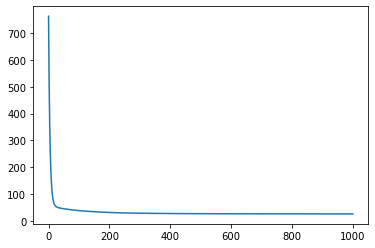

In [30]:
plt.plot(losses)
plt.show()

In [31]:
losses  

[762.2170242214532,
 622.8494729645348,
 510.92158727195323,
 421.02080226292526,
 348.8022999594949,
 290.7783717968456,
 244.14933420546961,
 206.66779996941204,
 176.52972516927923,
 152.28694961224755,
 132.77699066615554,
 117.0666868682955,
 104.40695912342632,
 94.19649629173298,
 85.95260462628312,
 79.28780782648286,
 73.89106326673338,
 69.51268375393659,
 65.95223381336253,
 63.04881370899155,
 60.673260162987006,
 58.721885661471084,
 57.11145282519875,
 55.775140200277136,
 54.659303888609614,
 53.72087802044435,
 52.925288042786164,
 52.244775658994406,
 51.657054211941485,
 51.144229323171174,
 50.69193246023671,
 50.28862542726027,
 49.925042060196134,
 49.59374006003011,
 49.2887412366881,
 49.00524272262025,
 48.73938515567032,
 48.48806659273798,
 48.248793132792045,
 48.019559007478314,
 47.798750326168474,
 47.585067809074125,
 47.37746476259939,
 47.17509729005588,
 46.97728432403876,
 46.78347554292085,
 46.593225616145894,
 46.40617352982495,
 46.222025990433856

In [32]:
# Rezolvare cerinta 2
theta, losses = train(x_train_scaled, y_train, alpha = 0.05, max_iters = 10000, verbose = True)
losses 



Iteratia 1000; loss = 26.56409115702073
Iteratia 2000; loss = 26.21279517553389
Iteratia 3000; loss = 26.062304600407817
Iteratia 4000; loss = 25.969400788034445
Iteratia 5000; loss = 25.90669254610855
Iteratia 6000; loss = 25.86347824984381
Iteratia 7000; loss = 25.833557577102376
Iteratia 8000; loss = 25.812819176579453
Iteratia 9000; loss = 25.798441697617402
Iteratia 10000; loss = 25.788473571036715


[762.2170242214532,
 622.8494729645348,
 510.92158727195323,
 421.02080226292526,
 348.8022999594949,
 290.7783717968456,
 244.14933420546961,
 206.66779996941204,
 176.52972516927923,
 152.28694961224755,
 132.77699066615554,
 117.0666868682955,
 104.40695912342632,
 94.19649629173298,
 85.95260462628312,
 79.28780782648286,
 73.89106326673338,
 69.51268375393659,
 65.95223381336253,
 63.04881370899155,
 60.673260162987006,
 58.721885661471084,
 57.11145282519875,
 55.775140200277136,
 54.659303888609614,
 53.72087802044435,
 52.925288042786164,
 52.244775658994406,
 51.657054211941485,
 51.144229323171174,
 50.69193246023671,
 50.28862542726027,
 49.925042060196134,
 49.59374006003011,
 49.2887412366881,
 49.00524272262025,
 48.73938515567032,
 48.48806659273798,
 48.248793132792045,
 48.019559007478314,
 47.798750326168474,
 47.585067809074125,
 47.37746476259939,
 47.17509729005588,
 46.97728432403876,
 46.78347554292085,
 46.593225616145894,
 46.40617352982495,
 46.222025990433856

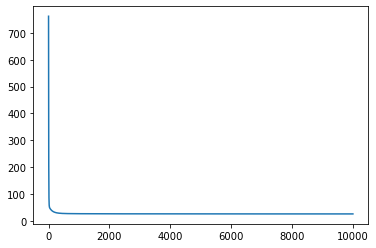

In [33]:
plt.plot(losses)
plt.show()

## Metoda ecuatiilor normale

Pentru regresia liniara se pot determina ponderile $\theta$ folosind metoda ecuatiilor normale. Formula pentru $\theta$ este:

$$
{\theta}^{(min)} = \left(\mathbf{X}^t \mathbf{X}\right)^{-1}\mathbf{X}^t\cdot \mathbf{y}
$$
unde $\mathbf{X}$ este matricea de design, $\mathbf{y}$ este vectorul de valori ground truth. 

Pentru determinarea pseudoinversei $\left(\mathbf{X}^t \mathbf{X}\right)^{-1}\mathbf{X}^t$ a matricei $\mathbf{X}$ se poate folosi functia `np.linalg.pinv` din [NumPy](https://numpy.org/doc/stable/reference/generated/numpy.linalg.pinv.html).

Determinati vectorul de valori de ponderi folosind metoda pseudoinversei si comparati cu vectorul de ponderi determinat prin metoda gradientului, pentru un $\alpha$ care duce la convergenta antrenarii.

Observatie: in metoda ecuatiilor normale nu este nevoie de a face scalarea/standardizarea datelor, spre deosebire de metoda gradient descent. Pentru comparatie, insa, folositi matricea scalata `x_train_scaled`.

In [34]:
theta_normal = np.linalg.inv(x_train_scaled.T @ x_train_scaled) @ x_train_scaled.T @ y_train
print(f'Vectorul de ponderi determinat prin metoda ecuatiilor normale este:\n{theta_normal}')

Vectorul de ponderi determinat prin metoda ecuatiilor normale este:
[[ 28.89814904]
 [-12.20085007]
 [-19.83341017]
 [ 10.74840906]
 [ 20.49110317]
 [  3.02186804]]


In [35]:
# determinam un vector de ponderi prin metoda gradient descent, folosind setul de antrenare
theta_gradient, _ = train(x_train_scaled, y_train, alpha=0.05, max_iters=10000, verbose=False)
print(f'Vectorul de ponderi determinat prin metoda gradient descent este:\n{theta_gradient}')

Vectorul de ponderi determinat prin metoda gradient descent este:
[[ 26.88485516]
 [-12.16943422]
 [-17.77297179]
 [ 10.9450115 ]
 [ 21.21824606]
 [  4.87539143]]


In [36]:
print(f'Distanta intre vectorii determinati prin cele doua metode: {np.linalg.norm(theta_gradient - theta_normal)}')

Distanta intre vectorii determinati prin cele doua metode: 3.507518179145939


## Selectare de atribute

In setul de date initial sunt prezente si latitudinea si longitudinea proprietatilor vandute - coloanele X5 si X6, adica ultmele doua din matricele x_train si x_test:

In [37]:
full_data.head()

,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
No,,,,,,
289,16.6,323.6912,6,24.97841,121.54280,51.0
315,3.7,577.9615,6,24.97201,121.54722,41.6
170,8.4,1962.6280,1,24.95468,121.55481,23.5
263,15.9,289.3248,5,24.98203,121.54348,53.0
295,26.4,335.5273,6,24.97960,121.54140,38.1


Ne punem intrebarea daca scoaterea lor imbunatateste performanta modelului de predictie. Implementati si executati urmatorii pasi:

1. Stergeti ultimele doua coloane din x_train si x_test;
1. Reapelati functiile de preprocesare pe matricele date; e nevoie de acest lucru, pentru ca vectorii de minime si maxime pe coloane vor avea acum cu 2 elemente mai putin.
1. Reantrenati modelul cu metoda gradient descent si calculati MSE pe setul de antrenare si de testare. Comparati cu valorile obtinute in sectiunea de testare, atat pentru setul de antrenare, cat mai ales pentru setul de testare. Cum comentati rezultatele obtinute?